Se intenta demostrar la siguiente hipótesis:

### Durante la temporada alta (Julio, Agosto y Septiembre), se registran mayor cantidad de accidentes de tráfico en los barrios más turísticos de la ciudad de Barcelona.

In [1]:
import pandas as pd
import os
import sys
import utils.folders_tb as fo
import utils.mining_data_tb as mi
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Data Wrangling

En el afán de demostrar la hipótesis planteada, se comienza a realizar el tratamiento de los datos recopilados para poder trabajar con ellos posteriormente. Para esto, se crean las correspondientes listas de dataframes, con los datasets de cada año (desde el 2010 hasta el 2020).

In [2]:
lista_df_gu = fo.enlistar_dataframes('_ACCIDENTS_GU_BCN_')

Al tratarse de diferentes conjuntos de datos (uno para cada año), es probable que el formato utilizado para recopilar la información haya sufrido algunas modificaciones que deberían subsanarse.

Se comparan las columnas de los dataframes de cada año para verificarlo.

In [3]:
mi.comparar_columnas(lista_df_gu)

Las columnas de 0 (25) y 1 (25) COINCIDEN.
Las columnas de 1 (25) y 2 (25) COINCIDEN.
Las columnas de 2 (25) y 3 (25) COINCIDEN.
Las columnas de 3 (25) y 4 (25) COINCIDEN.

Las columnas de 4 (25) y 5 (25) SON DISTINTAS.

         Posición de columna diferente: 0
         ---------------------------------
         Columna de DF en posición 4: Número d'expedient
         Columna de DF en posición 5: Número d expedient

         Posición de columna diferente: 3
         ---------------------------------
         Columna de DF en posición 4: NK barri
         Columna de DF en posición 5: Codi barri

         Posición de columna diferente: 9
         ---------------------------------
         Columna de DF en posición 4: Dia de setmana
         Columna de DF en posición 5: Dia setmana

4 (25) y 6 (27) tienen distinta CANTIDAD de columnas.
4 (25) y 7 (27) tienen distinta CANTIDAD de columnas.
4 (25) y 8 (27) tienen distinta CANTIDAD de columnas.
4 (25) y 9 (27) tienen distinta CANTIDAD de co

In [4]:
mi.nombre_cada_columna(lista_df_gu)

Columna en posición 0

DF en posición 0: Número d'expedient
DF en posición 1: Número d'expedient
DF en posición 2: Número d'expedient
DF en posición 3: Número d'expedient
DF en posición 4: Número d'expedient
DF en posición 5: Número d expedient
DF en posición 6: Numero_expedient
DF en posición 7: Numero_expedient
DF en posición 8: Numero_expedient
DF en posición 9: Numero_expedient
DF en posición 10: Numero_expedient

-------------------------------------

Columna en posición 1

DF en posición 0: Codi districte
DF en posición 1: Codi districte
DF en posición 2: Codi districte
DF en posición 3: Codi districte
DF en posición 4: Codi districte
DF en posición 5: Codi districte
DF en posición 6: Codi_districte
DF en posición 7: Codi_districte
DF en posición 8: Codi_districte
DF en posición 9: Codi_districte
DF en posición 10: Codi_districte

-------------------------------------

Columna en posición 2

DF en posición 0: Nom districte
DF en posición 1: Nom districte
DF en posición 2: Nom dis

Se realiza un análisis de cuáles serían los datos de interés para definir los oportunos a la hora de llevar adelante el estudio.

Se define así, que las columnas que formarán parte del nuevo conjunto de datos serán:
- Número de expediente
- Nombre de distrito
- Nombre de barrio
- Nombre de calle
- Día de la semana
- Año
- Mes
- Día
- Hora
- Turno
- Número de víctimas
- Número de lesionados leves
- Número de lesionados graves
- Número de muertos


In [5]:
df_accidentes = mi.crear_df_gu(lista_df_gu)

In [6]:
df_accidentes

NUMERO_EXPEDIENTE        DISTRITO                          BARRIO  \
0            2010S003688      Sant Martí      el Camp de l'Arpa del Clot   
1            2010S007597      Sant Martí      el Camp de l'Arpa del Clot   
2            2010S001390      Sant Martí      el Camp de l'Arpa del Clot   
3            2010S005416      Sant Martí      el Camp de l'Arpa del Clot   
4            2010S008924      Sant Martí      el Camp de l'Arpa del Clot   
...                  ...             ...                             ...   
102991   2020S006274      Horta-Guinardó                       el Carmel   
102992   2020S006275            Eixample                     Sant Antoni   
102993   2020S006276        Ciutat Vella                  el Barri Gòtic   
102994   2020S006277            Eixample  la Nova Esquerra de l'Eixample   
102995   2020S006278          Nou Barris   Vilapicina i la Torre Llobeta   

                           CALLE DIA_SEMANA     ANO       MES   DIA  HORA  \
0                      Meridiana  Divendres  2010.0      Maig  28.0  19.0   
1                       Trinxant    Dilluns  2010.0  Novembre   8.0  11.0   
2       Sant Antoni Maria Claret     Dijous  2010.0    Febrer  25.0  13.0   
3                         Freser    Dimarts  2010.0     Agost   3.0  14.0   
4                      Indústria  Divendres  2010.0  Desembre  24.0  14.0   
...                          ...        ...     ...       ...   ...   ...   
102991         Lluís Marià Vidal     Dijous  2020.0  Desembre  31.0  17.0   
102992                 Sepúlveda     Dijous  2020.0  Desembre  31.0  20.0   
102993       Litoral (Llobregat)     Dijous  2020.0  Desembre  31.0  13.0   
102994                     Aragó     Dijous  2020.0  Desembre  31.0  21.0   
102995                    Quinze    Dimarts  2020.0  Desembre  22.0  11.0   

        TURNO  NUMERO_VICTIMAS  VICTIMAS_LEVES  VICTIMAS_GRAVES  \
0       Tarda              0.0             0.0              0.0   
1        Matí              1.0             1.0              0.0   
2        Matí              1.0             1.0              0.0   
3       Tarda              1.0             1.0              0.0   
4       Tarda              2.0             2.0              0.0   
...       ...              ...             ...              ...   
102991  Tarda              0.0             0.0              0.0   
102992  Tarda              2.0             2.0              0.0   
102993   Matí              2.0             2.0              0.0   
102994  Tarda              2.0             2.0              0.0   
102995   Matí              0.0             0.0              0.0   

        VICTIMAS_FALLECIDAS  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
...                     ...  
102991                  0.0  
102992                  0.0  
102993                  0.0  
102994                  0.0  
102995                  0.0  

[102996 rows x 14 columns]

Se realizan algunas búsquedas para diferentes números de expediente como método de verificación.

In [7]:
df_accidentes.iloc[400,:]

NUMERO_EXPEDIENTE              2010S004517
DISTRITO               Sarrià-Sant Gervasi
BARRIO                     les Tres Torres
CALLE                             Bonanova
DIA_SEMANA                         Dimarts
ANO                                 2010.0
MES                                   Juny
DIA                                   29.0
HORA                                  20.0
TURNO                                Tarda
NUMERO_VICTIMAS                        1.0
VICTIMAS_LEVES                         1.0
VICTIMAS_GRAVES                        0.0
VICTIMAS_FALLECIDAS                    0.0
Name: 400, dtype: object

In [8]:
df_accidentes[df_accidentes['NUMERO_EXPEDIENTE'] == '2010S004517']

NUMERO_EXPEDIENTE             DISTRITO           BARRIO     CALLE  \
400       2010S004517  Sarrià-Sant Gervasi  les Tres Torres  Bonanova   

    DIA_SEMANA     ANO   MES   DIA  HORA  TURNO  NUMERO_VICTIMAS  \
400    Dimarts  2010.0  Juny  29.0  20.0  Tarda              1.0   

     VICTIMAS_LEVES  VICTIMAS_GRAVES  VICTIMAS_FALLECIDAS  
400             1.0              0.0                  0.0

---

In [9]:
df_accidentes.iloc[8000,:]

NUMERO_EXPEDIENTE          2010S008942
DISTRITO                  Ciutat Vella
BARRIO                        el Raval
CALLE                  Litoral (Besòs)
DIA_SEMANA                    Dissabte
ANO                             2010.0
MES                           Desembre
DIA                               25.0
HORA                               6.0
TURNO                             Matí
NUMERO_VICTIMAS                    0.0
VICTIMAS_LEVES                     0.0
VICTIMAS_GRAVES                    0.0
VICTIMAS_FALLECIDAS                0.0
Name: 8000, dtype: object

In [10]:
df_accidentes[df_accidentes['NUMERO_EXPEDIENTE'] == '2010S008942']

NUMERO_EXPEDIENTE      DISTRITO    BARRIO            CALLE DIA_SEMANA  \
8000       2010S008942  Ciutat Vella  el Raval  Litoral (Besòs)   Dissabte   

         ANO       MES   DIA  HORA TURNO  NUMERO_VICTIMAS  VICTIMAS_LEVES  \
8000  2010.0  Desembre  25.0   6.0  Matí              0.0             0.0   

      VICTIMAS_GRAVES  VICTIMAS_FALLECIDAS  
8000              0.0                  0.0

---

In [11]:
df_accidentes.iloc[38000,:]

NUMERO_EXPEDIENTE                        2014S002077
DISTRITO                                  Sant Martí
BARRIO                 la Vila Olímpica del Poblenou
CALLE                            Litoral (Llobregat)
DIA_SEMANA                                    Dijous
ANO                                           2014.0
MES                                             Març
DIA                                             20.0
HORA                                            15.0
TURNO                                          Tarda
NUMERO_VICTIMAS                                  1.0
VICTIMAS_LEVES                                   1.0
VICTIMAS_GRAVES                                  0.0
VICTIMAS_FALLECIDAS                              0.0
Name: 38000, dtype: object

In [12]:
df_accidentes[df_accidentes['NUMERO_EXPEDIENTE'] == '2014S002077']

NUMERO_EXPEDIENTE    DISTRITO                         BARRIO  \
38000       2014S002077  Sant Martí  la Vila Olímpica del Poblenou   

                     CALLE DIA_SEMANA     ANO   MES   DIA  HORA  TURNO  \
38000  Litoral (Llobregat)     Dijous  2014.0  Març  20.0  15.0  Tarda   

       NUMERO_VICTIMAS  VICTIMAS_LEVES  VICTIMAS_GRAVES  VICTIMAS_FALLECIDAS  
38000              1.0             1.0              0.0                  0.0

---

In [13]:
df_accidentes.iloc[88000,:]

NUMERO_EXPEDIENTE                                        2019S001301    
DISTRITO                                                        Eixample
BARRIO                                                       Sant Antoni
CALLE                  Viladomat / Corts Catalanes                   ...
DIA_SEMANA                                                       Dilluns
ANO                                                               2019.0
MES                                                               Febrer
DIA                                                                 18.0
HORA                                                                14.0
TURNO                                                              Tarda
NUMERO_VICTIMAS                                                      1.0
VICTIMAS_LEVES                                                       1.0
VICTIMAS_GRAVES                                                      0.0
VICTIMAS_FALLECIDAS                                

In [14]:
df_accidentes.iloc[88000,:]['NUMERO_EXPEDIENTE']

'2019S001301    '

In [15]:
df_accidentes.iloc[88000,:]['CALLE']

'Viladomat / Corts Catalanes                       '

In [16]:
df_accidentes[df_accidentes['NUMERO_EXPEDIENTE'] == '2019S001301    ']

NUMERO_EXPEDIENTE  DISTRITO       BARRIO  \
88000   2019S001301      Eixample  Sant Antoni   

                                                   CALLE DIA_SEMANA     ANO  \
88000  Viladomat / Corts Catalanes                   ...    Dilluns  2019.0   

          MES   DIA  HORA  TURNO  NUMERO_VICTIMAS  VICTIMAS_LEVES  \
88000  Febrer  18.0  14.0  Tarda              1.0             1.0   

       VICTIMAS_GRAVES  VICTIMAS_FALLECIDAS  
88000              0.0                  0.0

---

In [17]:
df_accidentes.iloc[100000,:]

NUMERO_EXPEDIENTE      2020S003281    
DISTRITO                      Eixample
BARRIO                   el Fort Pienc
CALLE                  Corts Catalanes
DIA_SEMANA                     Dilluns
ANO                             2020.0
MES                             Juliol
DIA                               20.0
HORA                              13.0
TURNO                             Matí
NUMERO_VICTIMAS                    2.0
VICTIMAS_LEVES                     2.0
VICTIMAS_GRAVES                    0.0
VICTIMAS_FALLECIDAS                0.0
Name: 100000, dtype: object

In [18]:
df_accidentes[df_accidentes['NUMERO_EXPEDIENTE'] == '2020S003281    ']

NUMERO_EXPEDIENTE  DISTRITO         BARRIO            CALLE DIA_SEMANA  \
100000   2020S003281      Eixample  el Fort Pienc  Corts Catalanes    Dilluns   

           ANO     MES   DIA  HORA TURNO  NUMERO_VICTIMAS  VICTIMAS_LEVES  \
100000  2020.0  Juliol  20.0  13.0  Matí              2.0             2.0   

        VICTIMAS_GRAVES  VICTIMAS_FALLECIDAS  
100000              0.0                  0.0

Se observa un inconveniente. Aparentemente, para los últimos años, se han agregado espacios en blanco al final de algunos strings. Se procede a corregir este obstáculo para contar con datos unificados.

In [19]:
mi.quitar_espacios(df_accidentes)

Ahora se puede ver cómo los strings no cuentan con espacios en blanco ni al inicio ni al final.

In [20]:
df_accidentes.iloc[88000,:]

NUMERO_EXPEDIENTE                      2019S001301
DISTRITO                                  Eixample
BARRIO                                 Sant Antoni
CALLE                  Viladomat / Corts Catalanes
DIA_SEMANA                                 Dilluns
ANO                                         2019.0
MES                                         Febrer
DIA                                           18.0
HORA                                          14.0
TURNO                                        Tarda
NUMERO_VICTIMAS                                1.0
VICTIMAS_LEVES                                 1.0
VICTIMAS_GRAVES                                0.0
VICTIMAS_FALLECIDAS                            0.0
Name: 88000, dtype: object

In [21]:
df_accidentes.iloc[100000,:]

NUMERO_EXPEDIENTE          2020S003281
DISTRITO                      Eixample
BARRIO                   el Fort Pienc
CALLE                  Corts Catalanes
DIA_SEMANA                     Dilluns
ANO                             2020.0
MES                             Juliol
DIA                               20.0
HORA                              13.0
TURNO                             Matí
NUMERO_VICTIMAS                    2.0
VICTIMAS_LEVES                     2.0
VICTIMAS_GRAVES                    0.0
VICTIMAS_FALLECIDAS                0.0
Name: 100000, dtype: object

## Data Cleaning

Continuando con la limpieza de los datos para su posterior visualización, se desea verificar la presencia de datos duplicados, para que los mismos no generen resultados alterados indebidos.

In [22]:
print('Dimensiones de df_accidentes:  Filas --> ' + str(df_accidentes.shape[0]) + '  Columnas --> ' + str(df_accidentes.shape[1]) + '\n')
print('Cantidad de números de expediente duplicados en df_accidentes:' , df_accidentes['NUMERO_EXPEDIENTE'].duplicated().sum(), '\n')
print('Cantidad de filas duplicadas de df_accidentes:' , df_accidentes.duplicated().sum())


Dimensiones de df_accidentes:  Filas --> 102996  Columnas --> 14

Cantidad de números de expediente duplicados en df_accidentes: 21 

Cantidad de filas duplicadas de df_accidentes: 21


Como se puede observar, el dataframe cuenta con 102996 filas, de las cuales hay 21 que tienen exactamente los mismos datos. Éstas filas generarían una desviación en el análisis, por lo que deben ser removidas.

In [23]:
df_accidentes.drop_duplicates(inplace = True, ignore_index= True)

In [24]:
print('Dimensiones de df_accidentes:  Filas --> ' + str(df_accidentes.shape[0]) + '  Columnas --> ' + str(df_accidentes.shape[1]) + '\n')
print('Cantidad de números de expediente duplicados en df_accidentes:' , df_accidentes['NUMERO_EXPEDIENTE'].duplicated().sum(), '\n')
print('Cantidad de filas duplicadas de df_accidentes:' , df_accidentes.duplicated().sum())

Dimensiones de df_accidentes:  Filas --> 102975  Columnas --> 14

Cantidad de números de expediente duplicados en df_accidentes: 0 

Cantidad de filas duplicadas de df_accidentes: 0


Una vez eliminados los datos duplicados, se realiza un análisis de los datos faltantes para definir qué se hará con ellos.

In [25]:
df_accidentes.isnull().sum()

NUMERO_EXPEDIENTE      0
DISTRITO               1
BARRIO                 1
CALLE                  2
DIA_SEMANA             0
ANO                    1
MES                    1
DIA                    1
HORA                   1
TURNO                  0
NUMERO_VICTIMAS        1
VICTIMAS_LEVES         1
VICTIMAS_GRAVES        1
VICTIMAS_FALLECIDAS    1
dtype: int64

Si se evalúan los datos faltantes de la columna "CALLE", se puede observar lo siguiente:

In [26]:
df_accidentes[df_accidentes['CALLE'].isna()]

NUMERO_EXPEDIENTE             DISTRITO  \
56285        10/02/2016                  NaN   
84385       2018S008677  Sarrià-Sant Gervasi   

                                      BARRIO CALLE DIA_SEMANA     ANO  \
56285                                    NaN   NaN          1     NaN   
84385  Vallvidrera, el Tibidabo i les Planes   NaN    Dilluns  2018.0   

            MES   DIA  HORA     TURNO  NUMERO_VICTIMAS  VICTIMAS_LEVES  \
56285       NaN   NaN   NaN  13:25:52              NaN             NaN   
84385  Novembre  12.0   0.0       Nit              0.0             0.0   

       VICTIMAS_GRAVES  VICTIMAS_FALLECIDAS  
56285              NaN                  NaN  
84385              0.0                  0.0

Se puede observar que, de los 2 datos faltantes de la columna "CALLE", uno corresponde a una serie de valores anómalos que no aportan valor a la investigación y deben ser eliminados. Por otro lado, el otro, representa un accidente al cual, efectivamente, no se le ha ingresado ningún nombre de calle. Dicho valor nulo no genera mayores inconvenientes, por lo que puede permanecer en el dataframe para no perder el dato del accidente.

In [27]:
df_accidentes.drop(df_accidentes.index[56285], inplace= True)

In [28]:
df_accidentes.reset_index(drop=True, inplace= True)
df_accidentes

NUMERO_EXPEDIENTE        DISTRITO                          BARRIO  \
0            2010S003688      Sant Martí      el Camp de l'Arpa del Clot   
1            2010S007597      Sant Martí      el Camp de l'Arpa del Clot   
2            2010S001390      Sant Martí      el Camp de l'Arpa del Clot   
3            2010S005416      Sant Martí      el Camp de l'Arpa del Clot   
4            2010S008924      Sant Martí      el Camp de l'Arpa del Clot   
...                  ...             ...                             ...   
102969       2020S006274  Horta-Guinardó                       el Carmel   
102970       2020S006275        Eixample                     Sant Antoni   
102971       2020S006276    Ciutat Vella                  el Barri Gòtic   
102972       2020S006277        Eixample  la Nova Esquerra de l'Eixample   
102973       2020S006278      Nou Barris   Vilapicina i la Torre Llobeta   

                           CALLE DIA_SEMANA     ANO       MES   DIA  HORA  \
0                      Meridiana  Divendres  2010.0      Maig  28.0  19.0   
1                       Trinxant    Dilluns  2010.0  Novembre   8.0  11.0   
2       Sant Antoni Maria Claret     Dijous  2010.0    Febrer  25.0  13.0   
3                         Freser    Dimarts  2010.0     Agost   3.0  14.0   
4                      Indústria  Divendres  2010.0  Desembre  24.0  14.0   
...                          ...        ...     ...       ...   ...   ...   
102969         Lluís Marià Vidal     Dijous  2020.0  Desembre  31.0  17.0   
102970                 Sepúlveda     Dijous  2020.0  Desembre  31.0  20.0   
102971       Litoral (Llobregat)     Dijous  2020.0  Desembre  31.0  13.0   
102972                     Aragó     Dijous  2020.0  Desembre  31.0  21.0   
102973                    Quinze    Dimarts  2020.0  Desembre  22.0  11.0   

        TURNO  NUMERO_VICTIMAS  VICTIMAS_LEVES  VICTIMAS_GRAVES  \
0       Tarda              0.0             0.0              0.0   
1        Matí              1.0             1.0              0.0   
2        Matí              1.0             1.0              0.0   
3       Tarda              1.0             1.0              0.0   
4       Tarda              2.0             2.0              0.0   
...       ...              ...             ...              ...   
102969  Tarda              0.0             0.0              0.0   
102970  Tarda              2.0             2.0              0.0   
102971   Matí              2.0             2.0              0.0   
102972  Tarda              2.0             2.0              0.0   
102973   Matí              0.0             0.0              0.0   

        VICTIMAS_FALLECIDAS  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
...                     ...  
102969                  0.0  
102970                  0.0  
102971                  0.0  
102972                  0.0  
102973                  0.0  

[102974 rows x 14 columns]

In [29]:
df_accidentes[df_accidentes['CALLE'].isna()]

NUMERO_EXPEDIENTE             DISTRITO  \
84384       2018S008677  Sarrià-Sant Gervasi   

                                      BARRIO CALLE DIA_SEMANA     ANO  \
84384  Vallvidrera, el Tibidabo i les Planes   NaN    Dilluns  2018.0   

            MES   DIA  HORA TURNO  NUMERO_VICTIMAS  VICTIMAS_LEVES  \
84384  Novembre  12.0   0.0   Nit              0.0             0.0   

       VICTIMAS_GRAVES  VICTIMAS_FALLECIDAS  
84384              0.0                  0.0

In [30]:
df_accidentes.nunique()

NUMERO_EXPEDIENTE      102974
DISTRITO                   11
BARRIO                     75
CALLE                    8254
DIA_SEMANA                  7
ANO                        11
MES                        12
DIA                        31
HORA                       24
TURNO                       3
NUMERO_VICTIMAS            18
VICTIMAS_LEVES             17
VICTIMAS_GRAVES             5
VICTIMAS_FALLECIDAS         4
dtype: int64

Aquí se puede apreciar que, al menos, los valores cualitativos son congruentes. Esto significa, que los mismos cuentan con tantos valores únicos como serían los esperados. Por ejemplo, 31 valores únicos para los días del mes, 7 para los días de la semana, o bien 3 para los turnos de un día.

Ahora se procede a evaluar el tipo de valor que contiene cada una de las columnas.

In [31]:
df_accidentes['DISTRITO'].unique()

array(['Sant Martí', 'Ciutat Vella', 'Eixample', 'Sants-Montjuïc',
       'Les Corts', 'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó',
       'Nou Barris', 'Sant Andreu', 'Desconegut'], dtype=object)

Para el caso de los distritos, se observa un valor "desconocido". Teniendo en cuenta el propósito del estudio, ese valor no es una buena señal, y sería conveniente cuantificarlo. Ésta situación podría presentarse en otras columnas, por lo que se hará una investigación.

In [32]:
df_accidentes[df_accidentes['DISTRITO'] == 'Desconegut']

NUMERO_EXPEDIENTE    DISTRITO      BARRIO       CALLE DIA_SEMANA  \
592          2010S005007  Desconegut  Desconegut  Desconegut   Dissabte   
1133         2010S001471  Desconegut  Desconegut  Desconegut    Dilluns   
1134         2010S004750  Desconegut  Desconegut  Desconegut     Dijous   
1690         2010S006049  Desconegut  Desconegut  Desconegut    Dimarts   
2244         2010S000804  Desconegut  Desconegut  Desconegut   Dimecres   
...                  ...         ...         ...         ...        ...   
100879       2020S004180  Desconegut  Desconegut  Desconegut    Dimarts   
101230       2020S004531  Desconegut  Desconegut  Desconegut     Dijous   
101855       2020S005158  Desconegut  Desconegut  Desconegut    Dimarts   
101976       2020S005279  Desconegut  Desconegut  Desconegut   Dimecres   
102241       2020S005544  Desconegut  Desconegut  Desconegut    Dimarts   

           ANO       MES   DIA  HORA  TURNO  NUMERO_VICTIMAS  VICTIMAS_LEVES  \
592     2010.0    Juliol  17.0   7.0   Matí              1.0             1.0   
1133    2010.0      Març   1.0  14.0  Tarda              1.0             1.0   
1134    2010.0    Juliol   8.0  13.0   Matí              1.0             1.0   
1690    2010.0  Setembre   7.0  14.0  Tarda              1.0             1.0   
2244    2010.0    Febrer   3.0   8.0   Matí              1.0             1.0   
...        ...       ...   ...   ...    ...              ...             ...   
100879  2020.0  Setembre  15.0  14.0  Tarda              1.0             1.0   
101230  2020.0   Octubre   1.0   8.0   Matí              1.0             1.0   
101855  2020.0  Novembre   3.0   9.0   Matí              1.0             1.0   
101976  2020.0  Novembre  11.0   9.0   Matí              1.0             1.0   
102241  2020.0  Novembre  24.0  22.0    Nit              1.0             1.0   

        VICTIMAS_GRAVES  VICTIMAS_FALLECIDAS  
592                 0.0                  0.0  
1133                0.0                  0.0  
1134                0.0                  0.0  
1690                0.0                  0.0  
2244                0.0                  0.0  
...                 ...                  ...  
100879              0.0                  0.0  
101230              0.0                  0.0  
101855              0.0                  0.0  
101976              0.0                  0.0  
102241              0.0                  0.0  

[197 rows x 14 columns]

In [33]:
df_accidentes[df_accidentes['BARRIO'] == 'Desconegut']

NUMERO_EXPEDIENTE    DISTRITO      BARRIO       CALLE DIA_SEMANA  \
592          2010S005007  Desconegut  Desconegut  Desconegut   Dissabte   
1133         2010S001471  Desconegut  Desconegut  Desconegut    Dilluns   
1134         2010S004750  Desconegut  Desconegut  Desconegut     Dijous   
1690         2010S006049  Desconegut  Desconegut  Desconegut    Dimarts   
2244         2010S000804  Desconegut  Desconegut  Desconegut   Dimecres   
...                  ...         ...         ...         ...        ...   
100879       2020S004180  Desconegut  Desconegut  Desconegut    Dimarts   
101230       2020S004531  Desconegut  Desconegut  Desconegut     Dijous   
101855       2020S005158  Desconegut  Desconegut  Desconegut    Dimarts   
101976       2020S005279  Desconegut  Desconegut  Desconegut   Dimecres   
102241       2020S005544  Desconegut  Desconegut  Desconegut    Dimarts   

           ANO       MES   DIA  HORA  TURNO  NUMERO_VICTIMAS  VICTIMAS_LEVES  \
592     2010.0    Juliol  17.0   7.0   Matí              1.0             1.0   
1133    2010.0      Març   1.0  14.0  Tarda              1.0             1.0   
1134    2010.0    Juliol   8.0  13.0   Matí              1.0             1.0   
1690    2010.0  Setembre   7.0  14.0  Tarda              1.0             1.0   
2244    2010.0    Febrer   3.0   8.0   Matí              1.0             1.0   
...        ...       ...   ...   ...    ...              ...             ...   
100879  2020.0  Setembre  15.0  14.0  Tarda              1.0             1.0   
101230  2020.0   Octubre   1.0   8.0   Matí              1.0             1.0   
101855  2020.0  Novembre   3.0   9.0   Matí              1.0             1.0   
101976  2020.0  Novembre  11.0   9.0   Matí              1.0             1.0   
102241  2020.0  Novembre  24.0  22.0    Nit              1.0             1.0   

        VICTIMAS_GRAVES  VICTIMAS_FALLECIDAS  
592                 0.0                  0.0  
1133                0.0                  0.0  
1134                0.0                  0.0  
1690                0.0                  0.0  
2244                0.0                  0.0  
...                 ...                  ...  
100879              0.0                  0.0  
101230              0.0                  0.0  
101855              0.0                  0.0  
101976              0.0                  0.0  
102241              0.0                  0.0  

[197 rows x 14 columns]

In [34]:
df_accidentes[df_accidentes['CALLE'] == 'Desconegut']

NUMERO_EXPEDIENTE    DISTRITO      BARRIO       CALLE DIA_SEMANA  \
592          2010S005007  Desconegut  Desconegut  Desconegut   Dissabte   
1133         2010S001471  Desconegut  Desconegut  Desconegut    Dilluns   
1134         2010S004750  Desconegut  Desconegut  Desconegut     Dijous   
1690         2010S006049  Desconegut  Desconegut  Desconegut    Dimarts   
2244         2010S000804  Desconegut  Desconegut  Desconegut   Dimecres   
...                  ...         ...         ...         ...        ...   
100879       2020S004180  Desconegut  Desconegut  Desconegut    Dimarts   
101230       2020S004531  Desconegut  Desconegut  Desconegut     Dijous   
101855       2020S005158  Desconegut  Desconegut  Desconegut    Dimarts   
101976       2020S005279  Desconegut  Desconegut  Desconegut   Dimecres   
102241       2020S005544  Desconegut  Desconegut  Desconegut    Dimarts   

           ANO       MES   DIA  HORA  TURNO  NUMERO_VICTIMAS  VICTIMAS_LEVES  \
592     2010.0    Juliol  17.0   7.0   Matí              1.0             1.0   
1133    2010.0      Març   1.0  14.0  Tarda              1.0             1.0   
1134    2010.0    Juliol   8.0  13.0   Matí              1.0             1.0   
1690    2010.0  Setembre   7.0  14.0  Tarda              1.0             1.0   
2244    2010.0    Febrer   3.0   8.0   Matí              1.0             1.0   
...        ...       ...   ...   ...    ...              ...             ...   
100879  2020.0  Setembre  15.0  14.0  Tarda              1.0             1.0   
101230  2020.0   Octubre   1.0   8.0   Matí              1.0             1.0   
101855  2020.0  Novembre   3.0   9.0   Matí              1.0             1.0   
101976  2020.0  Novembre  11.0   9.0   Matí              1.0             1.0   
102241  2020.0  Novembre  24.0  22.0    Nit              1.0             1.0   

        VICTIMAS_GRAVES  VICTIMAS_FALLECIDAS  
592                 0.0                  0.0  
1133                0.0                  0.0  
1134                0.0                  0.0  
1690                0.0                  0.0  
2244                0.0                  0.0  
...                 ...                  ...  
100879              0.0                  0.0  
101230              0.0                  0.0  
101855              0.0                  0.0  
101976              0.0                  0.0  
102241              0.0                  0.0  

[251 rows x 14 columns]

La estrategia que se sigue en esta situación, es la de reemplazar los valores perdidos ``"desconocido"`` por valores NaN. De esta manera, nuestros datos relacionados con las columnas restantes (cuyo valor es conocido), será tenida en cuenta en el análisis exploratorio, mientras que el valor ``"desconocido"`` no será tomado como un dato, ya sea de ``distrito``, ``barrio`` o ``calle``.

In [35]:
df_accidentes.replace('Desconegut', np.nan, inplace = True)

In [36]:
df_accidentes[df_accidentes['DISTRITO'] == 'Desconegut']

Empty DataFrame
Columns: [NUMERO_EXPEDIENTE, DISTRITO, BARRIO, CALLE, DIA_SEMANA, ANO, MES, DIA, HORA, TURNO, NUMERO_VICTIMAS, VICTIMAS_LEVES, VICTIMAS_GRAVES, VICTIMAS_FALLECIDAS]
Index: []

In [37]:
df_accidentes[df_accidentes['BARRIO'] == 'Desconegut']

Empty DataFrame
Columns: [NUMERO_EXPEDIENTE, DISTRITO, BARRIO, CALLE, DIA_SEMANA, ANO, MES, DIA, HORA, TURNO, NUMERO_VICTIMAS, VICTIMAS_LEVES, VICTIMAS_GRAVES, VICTIMAS_FALLECIDAS]
Index: []

In [38]:
df_accidentes[df_accidentes['CALLE'] == 'Desconegut']

Empty DataFrame
Columns: [NUMERO_EXPEDIENTE, DISTRITO, BARRIO, CALLE, DIA_SEMANA, ANO, MES, DIA, HORA, TURNO, NUMERO_VICTIMAS, VICTIMAS_LEVES, VICTIMAS_GRAVES, VICTIMAS_FALLECIDAS]
Index: []

Ahora, se debe tener en cuenta cuál es el tipo de valor de cada una de las columnas.

In [39]:
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102974 entries, 0 to 102973
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   NUMERO_EXPEDIENTE    102974 non-null  object 
 1   DISTRITO             102777 non-null  object 
 2   BARRIO               102777 non-null  object 
 3   CALLE                102722 non-null  object 
 4   DIA_SEMANA           102974 non-null  object 
 5   ANO                  102974 non-null  float64
 6   MES                  102974 non-null  object 
 7   DIA                  102974 non-null  float64
 8   HORA                 102974 non-null  float64
 9   TURNO                102974 non-null  object 
 10  NUMERO_VICTIMAS      102974 non-null  float64
 11  VICTIMAS_LEVES       102974 non-null  float64
 12  VICTIMAS_GRAVES      102974 non-null  float64
 13  VICTIMAS_FALLECIDAS  102974 non-null  float64
dtypes: float64(7), object(7)
memory usage: 11.0+ MB


La presencia de valores NaN en las columnas numéricas ha generado que, los números presentes en el dataframe, que se esperaría sean del tipo "int", figuren como "float64". Esto se puede remediar de la siguiente manera:

In [40]:
df_accidentes = df_accidentes.astype({"ANO": int, "DIA": int, "HORA": int, "NUMERO_VICTIMAS": int, "VICTIMAS_LEVES": int, "VICTIMAS_GRAVES": int, "VICTIMAS_FALLECIDAS": int})

In [41]:
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102974 entries, 0 to 102973
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   NUMERO_EXPEDIENTE    102974 non-null  object
 1   DISTRITO             102777 non-null  object
 2   BARRIO               102777 non-null  object
 3   CALLE                102722 non-null  object
 4   DIA_SEMANA           102974 non-null  object
 5   ANO                  102974 non-null  int32 
 6   MES                  102974 non-null  object
 7   DIA                  102974 non-null  int32 
 8   HORA                 102974 non-null  int32 
 9   TURNO                102974 non-null  object
 10  NUMERO_VICTIMAS      102974 non-null  int32 
 11  VICTIMAS_LEVES       102974 non-null  int32 
 12  VICTIMAS_GRAVES      102974 non-null  int32 
 13  VICTIMAS_FALLECIDAS  102974 non-null  int32 
dtypes: int32(7), object(7)
memory usage: 8.2+ MB


In [42]:
df_accidentes

NUMERO_EXPEDIENTE        DISTRITO                          BARRIO  \
0            2010S003688      Sant Martí      el Camp de l'Arpa del Clot   
1            2010S007597      Sant Martí      el Camp de l'Arpa del Clot   
2            2010S001390      Sant Martí      el Camp de l'Arpa del Clot   
3            2010S005416      Sant Martí      el Camp de l'Arpa del Clot   
4            2010S008924      Sant Martí      el Camp de l'Arpa del Clot   
...                  ...             ...                             ...   
102969       2020S006274  Horta-Guinardó                       el Carmel   
102970       2020S006275        Eixample                     Sant Antoni   
102971       2020S006276    Ciutat Vella                  el Barri Gòtic   
102972       2020S006277        Eixample  la Nova Esquerra de l'Eixample   
102973       2020S006278      Nou Barris   Vilapicina i la Torre Llobeta   

                           CALLE DIA_SEMANA   ANO       MES  DIA  HORA  TURNO  \
0                      Meridiana  Divendres  2010      Maig   28    19  Tarda   
1                       Trinxant    Dilluns  2010  Novembre    8    11   Matí   
2       Sant Antoni Maria Claret     Dijous  2010    Febrer   25    13   Matí   
3                         Freser    Dimarts  2010     Agost    3    14  Tarda   
4                      Indústria  Divendres  2010  Desembre   24    14  Tarda   
...                          ...        ...   ...       ...  ...   ...    ...   
102969         Lluís Marià Vidal     Dijous  2020  Desembre   31    17  Tarda   
102970                 Sepúlveda     Dijous  2020  Desembre   31    20  Tarda   
102971       Litoral (Llobregat)     Dijous  2020  Desembre   31    13   Matí   
102972                     Aragó     Dijous  2020  Desembre   31    21  Tarda   
102973                    Quinze    Dimarts  2020  Desembre   22    11   Matí   

        NUMERO_VICTIMAS  VICTIMAS_LEVES  VICTIMAS_GRAVES  VICTIMAS_FALLECIDAS  
0                     0               0                0                    0  
1                     1               1                0                    0  
2                     1               1                0                    0  
3                     1               1                0                    0  
4                     2               2                0                    0  
...                 ...             ...              ...                  ...  
102969                0               0                0                    0  
102970                2               2                0                    0  
102971                2               2                0                    0  
102972                2               2                0                    0  
102973                0               0                0                    0  

[102974 rows x 14 columns]

Otro inconveniente que se puede observar en el dataframe, pensando ya en el momento de la presentación del mismo, es el idioma. Teniendo en cuenta que el proyecto será presentado ante un público que posiblemente no domine perfectamente la lengua catalana, no estaría demás realizar la conversión al castellano. Para esto, es adecuado centrarse en las columnas que contienen datos a traducir. Estas son:
- Día de la semana
- Mes
- Turno

In [43]:
df_accidentes['DIA_SEMANA'].unique()

array(['Divendres', 'Dilluns', 'Dijous', 'Dimarts', 'Dimecres',
       'Diumenge', 'Dissabte'], dtype=object)

In [44]:
df_accidentes['MES'].unique()

array(['Maig', 'Novembre', 'Febrer', 'Agost', 'Desembre', 'Juny',
       'Juliol', 'Setembre', 'Març', 'Gener', 'Octubre', 'Abril'],
      dtype=object)

In [45]:
df_accidentes['TURNO'].unique()

array(['Tarda', 'Matí', 'Nit'], dtype=object)

In [46]:
mi.translate(df_accidentes)

In [47]:
df_accidentes

NUMERO_EXPEDIENTE        DISTRITO                          BARRIO  \
0            2010S003688      Sant Martí      el Camp de l'Arpa del Clot   
1            2010S007597      Sant Martí      el Camp de l'Arpa del Clot   
2            2010S001390      Sant Martí      el Camp de l'Arpa del Clot   
3            2010S005416      Sant Martí      el Camp de l'Arpa del Clot   
4            2010S008924      Sant Martí      el Camp de l'Arpa del Clot   
...                  ...             ...                             ...   
102969       2020S006274  Horta-Guinardó                       el Carmel   
102970       2020S006275        Eixample                     Sant Antoni   
102971       2020S006276    Ciutat Vella                  el Barri Gòtic   
102972       2020S006277        Eixample  la Nova Esquerra de l'Eixample   
102973       2020S006278      Nou Barris   Vilapicina i la Torre Llobeta   

                           CALLE DIA_SEMANA   ANO        MES  DIA  HORA  \
0                      Meridiana    Viernes  2010       Mayo   28    19   
1                       Trinxant      Lunes  2010  Noviembre    8    11   
2       Sant Antoni Maria Claret     Jueves  2010    Febrero   25    13   
3                         Freser     Martes  2010     Agosto    3    14   
4                      Indústria    Viernes  2010  Diciembre   24    14   
...                          ...        ...   ...        ...  ...   ...   
102969         Lluís Marià Vidal     Jueves  2020  Diciembre   31    17   
102970                 Sepúlveda     Jueves  2020  Diciembre   31    20   
102971       Litoral (Llobregat)     Jueves  2020  Diciembre   31    13   
102972                     Aragó     Jueves  2020  Diciembre   31    21   
102973                    Quinze     Martes  2020  Diciembre   22    11   

         TURNO  NUMERO_VICTIMAS  VICTIMAS_LEVES  VICTIMAS_GRAVES  \
0        Tarde                0               0                0   
1       Mañana                1               1                0   
2       Mañana                1               1                0   
3        Tarde                1               1                0   
4        Tarde                2               2                0   
...        ...              ...             ...              ...   
102969   Tarde                0               0                0   
102970   Tarde                2               2                0   
102971  Mañana                2               2                0   
102972   Tarde                2               2                0   
102973  Mañana                0               0                0   

        VICTIMAS_FALLECIDAS  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
102969                    0  
102970                    0  
102971                    0  
102972                    0  
102973                    0  

[102974 rows x 14 columns]

Una vez finalizado el Data Cleaning de nuestro conjunto de datos, es recomendable guardar el dataframe obtenido en un fichero .csv en la dirección data/DATA_POST_CLEANING para su rápida lectura y manipulación. Se logra mediante la ejecución de la siguiente función:

In [48]:
fo.df_to_csv_post_cleaning(df_accidentes, 'accidentes.csv')

A partir de ahora, se puede realizar la lectura del archivo obtenido luego de hacer el Data Cleaning de la siguiente manera:

In [49]:
accidentes = fo.leer_csv_post_cleaning('accidentes.csv')

In [57]:
plt.figure(figsize=(17,5))
sns.countplot((accidentes[accidentes['BARRIO'] != 'Desconegut']), order= (accidentes[accidentes['BARRIO'] != 'Desconegut').value_counts().index)
plt.xticks(rotation = 90)

SyntaxError: invalid syntax (<ipython-input-57-dd23dfc2afc4>, line 2)

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DISTRITO', ylabel='count'>

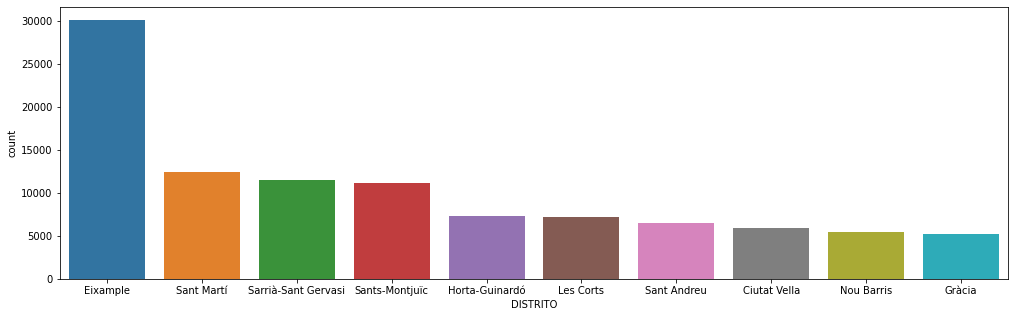

In [67]:
plt.figure(figsize=(17,5))
sns.countplot(accidentes['DISTRITO'], order= accidentes['DISTRITO'].value_counts().index)

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DIA_SEMANA', ylabel='count'>

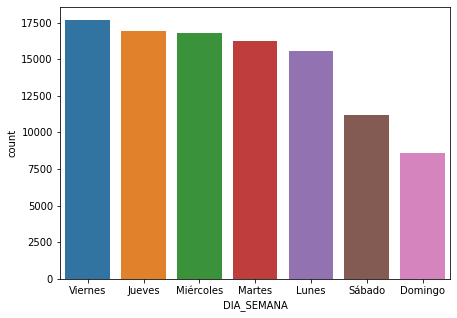

In [60]:
plt.figure(figsize=(7,5))
sns.countplot(accidentes['DIA_SEMANA'], order= accidentes['DIA_SEMANA'].value_counts().index)

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DIA_SEMANA', ylabel='count'>

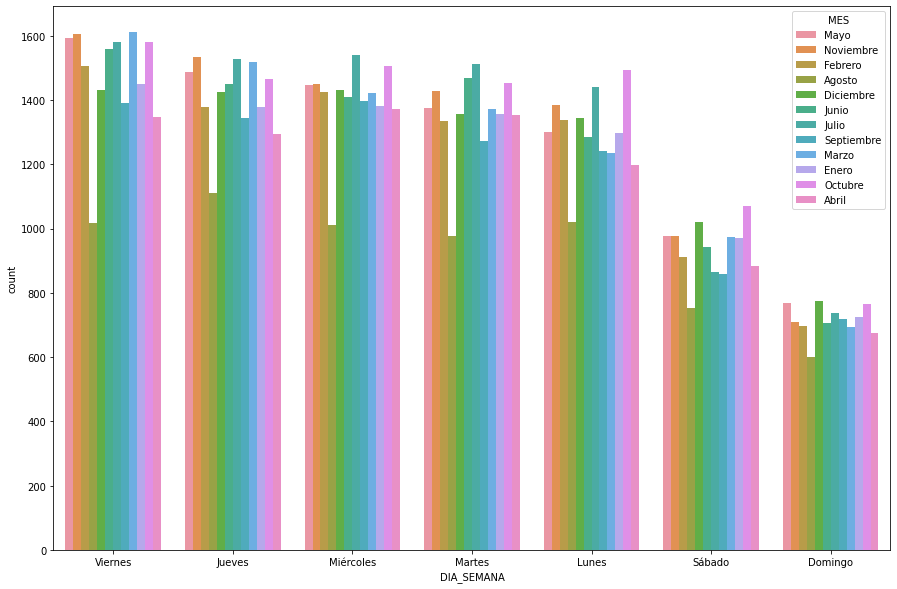

In [61]:
plt.figure(figsize=(15,10))
sns.countplot(accidentes['DIA_SEMANA'],hue='MES',  data= accidentes, order=accidentes['DIA_SEMANA'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='DIA_SEMANA'>

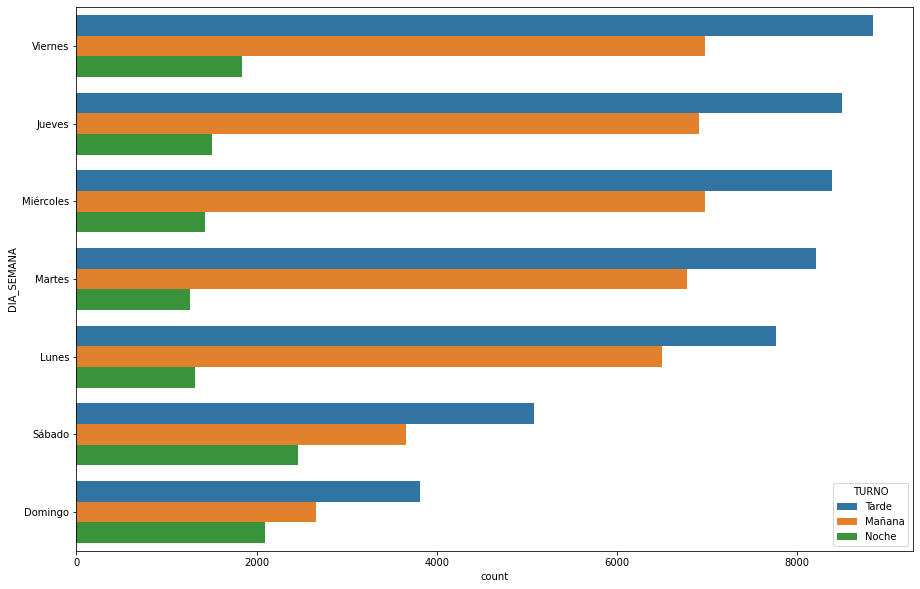

In [62]:
plt.figure(figsize=(15,10))
sns.countplot(y = accidentes['DIA_SEMANA'],hue='TURNO',  data= accidentes, order=accidentes['DIA_SEMANA'].value_counts().index)

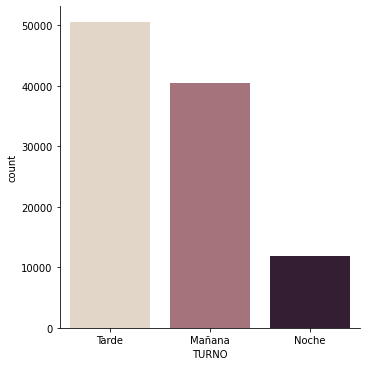

In [63]:
sns.catplot(x="TURNO", kind="count", palette="ch:.25", data=accidentes)

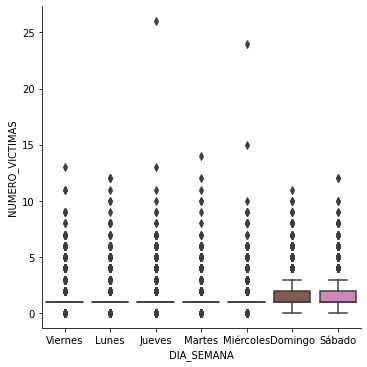

In [64]:
sns.catplot(x="DIA_SEMANA", y="NUMERO_VICTIMAS", kind="box", data=accidentes)

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MES', ylabel='count'>

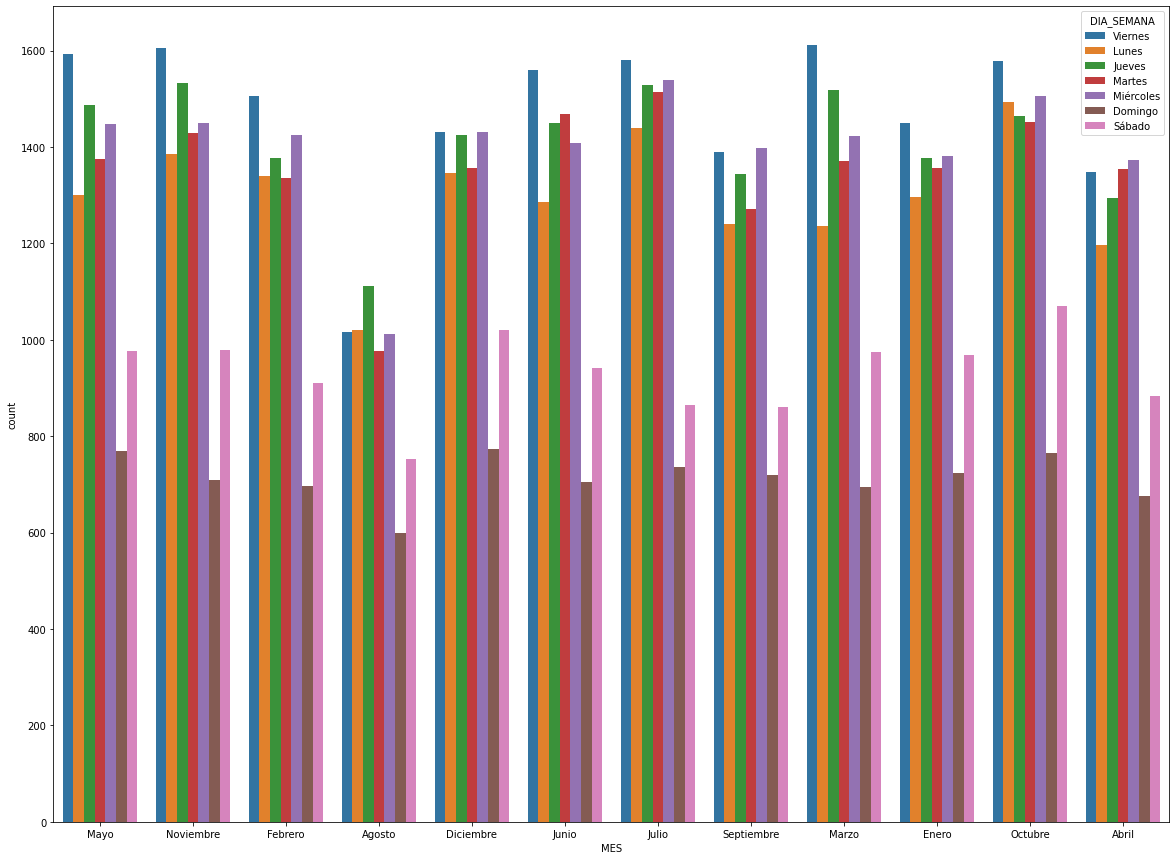

In [65]:
plt.figure(figsize=(20,15))
sns.countplot(accidentes['MES'],hue='DIA_SEMANA', data= accidentes)

In [66]:
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

NameError: name 'tips' is not defined

<AxesSubplot:xlabel='count', ylabel='ANO'>

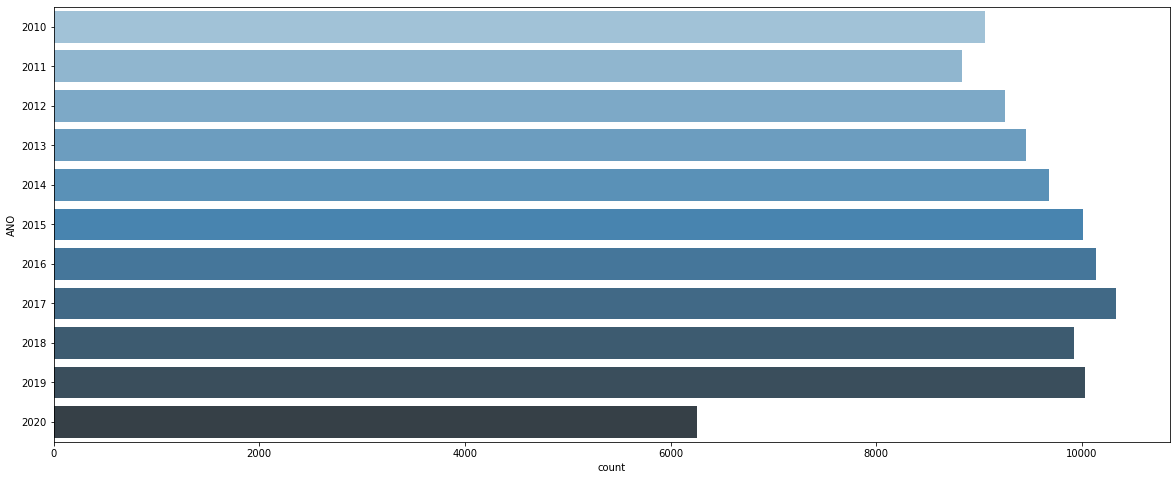

In [68]:
plt.figure(figsize=(20,8))
sns.countplot(y = 'ANO',
           palette = 'Blues_d',
           data = accidentes)

<AxesSubplot:>

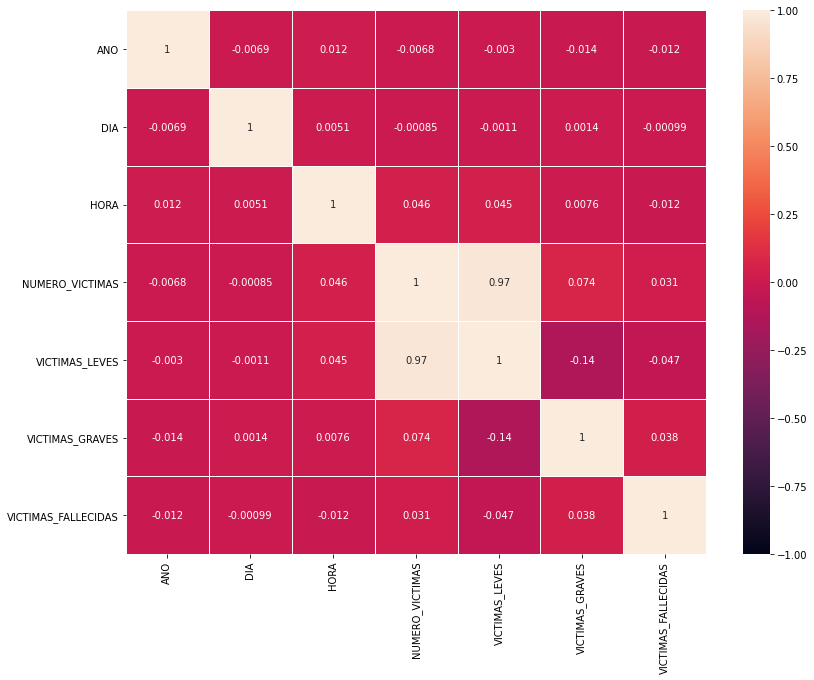

In [69]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(accidentes.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)

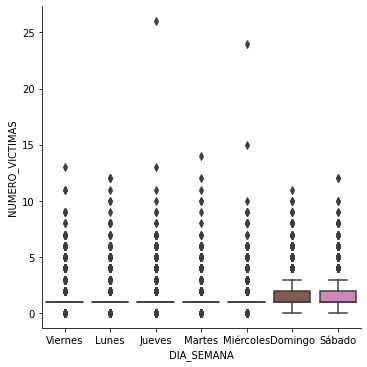

In [70]:
sns.catplot(x="DIA_SEMANA", y="NUMERO_VICTIMAS", kind="box", data=accidentes)

In [71]:
sns.stripplot(x = "DIA_SEMANA", y = accidentes_por_dia, data = accidentes, jitter = True)

NameError: name 'accidentes_por_dia' is not defined

In [72]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="DIA_SEMANA", data=accidentes)

TypeError: Horizontal orientation requires numeric `x` variable.

In [73]:
accidentes_por_dia = accidentes.groupby('DIA_SEMANA').count()['NUMERO_EXPEDIENTE']
accidentes_por_dia

DIA_SEMANA
Domingo       8569
Jueves       16912
Lunes        15580
Martes       16256
Miércoles    16789
Sábado       11199
Viernes      17669
Name: NUMERO_EXPEDIENTE, dtype: int64